In [1]:
import sys
import gensim, logging
import networkx as nx
import matplotlib.pyplot as plt 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
w = gensim.models.KeyedVectors.load_word2vec_format('araneum_upos_skipgram_300_2_2018.vec')

2018-05-30 09:28:56,882 : INFO : loading projection weights from araneum_upos_skipgram_300_2_2018.vec
2018-05-30 09:29:56,456 : INFO : loaded (196620, 300) matrix from araneum_upos_skipgram_300_2_2018.vec


In [3]:
w.init_sims(replace=True)

2018-05-30 09:30:00,320 : INFO : precomputing L2-norms of word weight vectors


In [16]:
words = ['зрение_NOUN', 'глаз_NOUN', 'взгляд_NOUN', 'просмотр_NOUN'] # подумать над словами

In [17]:
G = nx.Graph()

In [18]:
for word in words:
    if word in w:
        G.add_node(word)
        print(word)
        for _word in w.most_similar(positive=[word]):
            if _word[1] > 0.5:
                G.add_node(_word[0])
                G.add_edge(word, _word[0])
                print(_word[0], _word[1])
        print('\n')
    else:
        print(word + ' is not present in the model')
print('done')

зрение_NOUN
зре_NOUN 0.5576671361923218
сточка_NOUN 0.5464342832565308
точка_NOUN 0.5072427988052368


глаз_NOUN
глазенки_NOUN 0.6777330636978149
прищуривать_VERB 0.631229043006897
глазище_NOUN 0.6307992935180664
зенки_NOUN 0.6146133542060852
глазок_NOUN 0.6084049344062805
взор_NOUN 0.6072257161140442
зрачок_NOUN 0.5910003185272217
глазница_NOUN 0.5809442400932312
слезиться_VERB 0.5758044123649597
остекленеть_VERB 0.573017418384552


взгляд_NOUN
вгляд_NOUN 0.8218686580657959
взляд_NOUN 0.7796386480331421
взгяд_NOUN 0.7230920195579529
взгяд_ADV 0.6719161868095398
взор_NOUN 0.6496109962463379
взгля_NOUN 0.6375517845153809
окидывать_VERB 0.5582922697067261
исподлобья_ADV 0.5294947624206543
казаться_VERB 0.5256370306015015
испытующий_ADJ 0.5243182182312012


просмотр_NOUN
просматривать_VERB 0.611840546131134
просматривание_NOUN 0.5744640231132507
посмотр_NOUN 0.5533555746078491
прослушивание_NOUN 0.5393258333206177
скачивание_NOUN 0.5303411483764648
редактирование_NOUN 0.5001052618026733



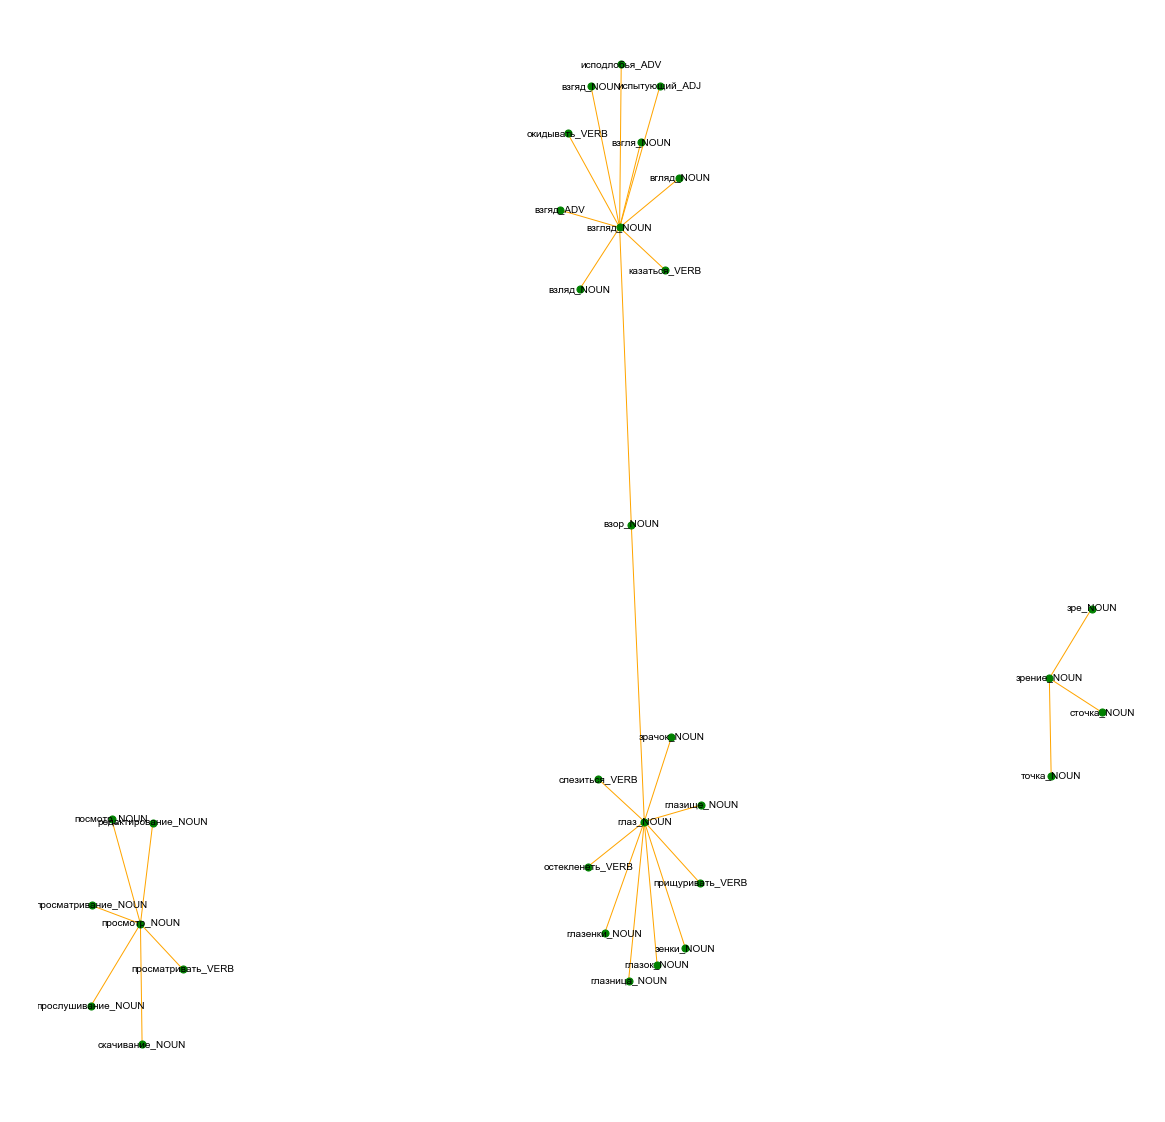

In [19]:
pos=nx.spring_layout(G)

plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_color='green', node_size=50) 
nx.draw_networkx_edges(G, pos, edge_color='orange')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

In [20]:
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True)[:5]:
    print(nodeid)

глаз_NOUN
взгляд_NOUN
просмотр_NOUN
зрение_NOUN
взор_NOUN


In [21]:
print(nx.radius(G))

NetworkXError: Found infinite path length because the graph is not connected

In [22]:
print(nx.average_clustering(G))
print(nx.transitivity(G))

0.0
0
